# Clean And Analyze Employee Exit Surveys
Over the course of this project we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The data is stored in two seperate data sets, [one for DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and [one for TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey). The data used in practice is slightly modified, including changing the encoding to `UTF-8` from the previously utilized `cp2152`.

In this project we're interesting in knowing the following:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The questions should be answered combining results from both data sets.


Below is a preview of a couple columns we'll work with from the dete_survey.csv:
- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:
- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

Let's begin by importing the necessary libraries, read our data sets into pandas and start exploring the data.

In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
pd.options.display.max_columns = 150 # All columns are now to be displayed

dete_survey.head(15)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,SD,SD,SD,D,SD,D,D,A,NaN,SA,A,A,N,N,D,A,D,D,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972,2007,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,SD,N,SD,D,A,A,D,D,SA,D,N,N,D,D,N,N,D,D,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988,1990,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,NaN,A,A,SA,SA,SA,SA,A,SA,SA,A,NaN,A,N,A,SA,A,SA,NaN,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,D,N,D,D,N,SD,SD,D,D,N,A,NaN,SD,SD,N,D,SD,D,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997,2008,Teacher Aide,NaN,Not Stated,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,SD,SD,SD,SD,A,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
tafe_survey.head(15)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [5]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

We make the following initial observations:
- The data sets contain a lot of columns, most of which we don't need for our analysis.
- Most columns have at least some missing data, and a couple a very significant amount.
- The data sets share many of the columns, though they are named differently.
- Data is not always represented consistently for certain columns or when comparing the data sets.
- There are indications that additional data is missing, though not recorded as such but rather "Not Stated", as in *dete_survey*.
- There are multiple columns indicating dissatisfaction as a reason for resignation for an employee.

### Fixing missing values not represented as such
The previously mentioned issue of missing values in *dete_survey* being represented as "Not Stated" instead of "NaN". We fix this by passing the `na_values='Not Stated'`-parameter that indicates that such values actually should be represented as missing when reading the file:

In [6]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

With that done, we now see an increased number of missing values in *dete_survey*, as excepted. For example, *Cease Date* now has 788 non-null values compared to the previous 822.

### Dropping superfluous columns
To make the dataframes easier to work with it is a good idea to only include columns that are useful for the current analysis. We will start by dropping columns 28-48 for *dete_survey* and 17-65 for *tafe_survey* as we don't need these for this particular analysis.

In [7]:
dete_survey_updated = dete_survey.drop(labels=dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(labels=tafe_survey.columns[17:66], axis=1)

### Renaming columns
As we eventually want to combine *dete_survey* and *tafe_survey* we want to achieve uniform naming of columns for the two dataframes.

Let's first make the following changes to *dete_survey* column names:
- Strictly lowercase
- No trailing whitespaces
- Whitespaces replaced with underscores

In [8]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

Let's rename columns in *tafe_survey* to match *dete_survey*. At this point we will only rename a couple of the columns as the others will be handled later.

In [9]:
column_mapping = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated.rename(mapper=column_mapping, axis=1, inplace=True)

tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

### Filtering the data
As we are only interested in employees who have resigned we'll look at the *separationtype*-column for the dataframes, with the intention of filtering non-resignation entries out. Let's look at the values we're working with for this column:

In [10]:
print(dete_survey_updated['separationtype'].value_counts(), '\n')
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64 

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


For *dete_survey* resignations is split in three subcategories, all of which we are interested in.

For *tafe_survey* we have a single resignation-category.

In [11]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

print(dete_resignations['separationtype'].value_counts(), '\n')
print(tafe_resignations['separationtype'].value_counts())

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64 

Resignation    340
Name: separationtype, dtype: int64


Our filtering seem to have been a success!

### Verifying data
As the data itself may be corrupted, we will now start looking at some of the data to see if it makes sense in this context.
Let's start looking at the dates listed in *dete_resignations*. Since it doesn't make sense that a persons employment would end before it started we will make sure that `dete_start_date` is an earlier date than `cease_date`.

We will begin by cleaning the `cease_date`-column in *dete_resignations*.

In [12]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
2010         1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

There seems to be some inconsistency in how the values are reported. Most of the time only the year is reported, in the form of `YYYY` but in several cases also the month is recorded, like `MM/YYYY`. In this case we will be satisfied only looking at the year. We can handle this by extracting the last 4 digits from each value.

In [13]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype('float')

dete_resignations['cease_date'].value_counts().sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

That looks better! Let's do a value_count for `dete_start_date` too:

In [14]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

Looking at the values themselves of `cease_Date` and `dete_start_date`, they all seem reasonable in this context.

We can see employments have been recorded as started before they ended. There are however some room for this not being the case, so let's just make sure that there are no cases of entries having an earlier cease_date than start date:

In [15]:
date_issues = dete_resignations[dete_resignations['cease_date'] < dete_resignations['dete_start_date']]
print(date_issues.shape[0])

0


As we can see, there are not such instances, which is pleasing!

Let's also look at the `cease_date`-column in *tafe_resignations*:

In [16]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

These all look like reasonable cease dates.

### Introducing new column
*tafe_survey* already includes a `institute_service`-column that stores the duration of employment in years. Values are listed like "1-2", "5-6" or "Less than 1 year".

Let's introduce a similar column in the *dete_survey* by subtracting the start dates from the cease dates. At this point we will be satisfied just recording the values as lower bound. That is, we write "1" instead of "1-2". This is not consistent with the *tafe_survey*, however, it doesn't represent our final desired form so we won't bother at this point.

In [17]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

### Dissatisfied employees
Next, let's try to identify dissatisfied employees. As mentioned earlier, there are a lot of columns that in in different ways can represent this. The following ones were considered most significant and will be focused on.

__tafe_survey__:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

__dete_survey__:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If at least one of the factors above indicates resignation due to dissatiscation, that employee will be marked as `dissatisfied` in a new column.

Let's start with cleaning the columns in *tafe_survey* by converting the values to True, False or NaN. We'll start by looking at what we're working with:

In [18]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [19]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [20]:
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = (tafe_resignations[['Contributing Factors. Dissatisfaction',
                                                        'Contributing Factors. Job Dissatisfaction']]
                                                        .applymap(update_vals).any(1, skipna=False))
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
True       8
Name: dissatisfied, dtype: int64

Let's create the corresponding column for *dete_survey*:

In [21]:
dete_resignations['dissatisfied'] = \
dete_resignations[['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']] \
.any(axis=1, skipna=False)

dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

Let's also make copies of `dete_resignations` and `tafe_resignations` to work with, to avoid *settingwithcopy warning*.

In [22]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

### Combining the data sets
Let's add a new column, `institute`, to both dataframes and set the value "DETE" for *dete_survey* and "TAFE" for *tafe_survey* so we can easily distinguish between the two when combined.

In [23]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

Let's now combine the two dataframes into one, `combined`. We'll also:

In [24]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

We still have several columns we don't need. Let's begin by dropping those with a lot of missing values, we'll demand atleast 500 non-null values from a column for it to remain.

In [25]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
separationtype       651
institute            651
dtype: int64

### Clean service column
The data sets are now combined and we can soon begin to attempt to answer our question. But firstly, recall that the data in the `institute_service`-column is represented inconsistently and need to be adressed. Let's arrange the numbers in this column into categories according to the following:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [26]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [27]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d?\d)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [28]:
def service_mapping(x):
    if x < 3:
        return "New"
    elif x < 6:
        return "Experienced"
    elif x <= 10:
        return "Established"
    else:
        return "Veteran"
    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(service_mapping)

combined_updated['service_cat'].value_counts(dropna=False)

Veteran        224
New            193
Experienced    155
Established     79
Name: service_cat, dtype: int64

The `service_cat` column now stores which category each employee belongs to, according to the definitions above.

### Initial analysis
It's now time to see if we can gain some insights from the data. Recall that we still have a couple (8 to be specific) of missing values in the dissatisfied column. Let's replace these with the mode of the dissatisfied series:

In [29]:
most_common = combined_updated['dissatisfied'].mode().iloc[0]
combined_updated['dissatisfied'].fillna(value=most_common, inplace=True)

combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

Let's create a pivot table representing the percentage of dissatisfaction for each service category:

In [30]:
combined_updated_pv = (combined_updated.pivot_table(index='service_cat', values='dissatisfied', aggfunc='mean')
                                                    .sort_values(by='dissatisfied'))
print(combined_updated_pv)

             dissatisfied
service_cat              
New              0.295337
Experienced      0.316129
Veteran          0.410714
Established      0.531646


Let's also create a bar-plot visualizing the pivot_table:

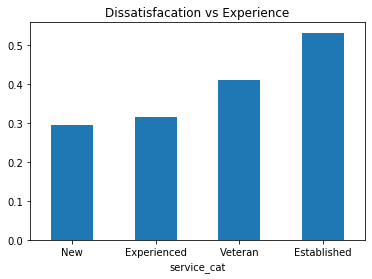

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

combined_updated_pv.plot(kind='bar', rot=0, legend=False, title='Dissatisfacation vs Experience')

- The share of resignations due to dissatisfaction seem to be significantly lower among new and experienced personel. (<7 years)
- Established employees have the highest share of dissatisfaction, followed by the most senior group: Veteran. (>= 7 years)

It appears that dissatisfaction in genereral is a more prevelant reason for resignation among more senior staff.

## Dissatisfaction by age
Let's also look at the question of dissatisfaction from the perspective of age. There is likely some correlation between the two as more years at the company likely on average correspond to a higher age. For example, a 25-year is very unlikely to have worked more than 11 years at the institute and be considered a veteran.

Let's start by looking at the values:

In [32]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
36  40           32
31  35           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

As we can see, we have some cleaning to do.

Let's decide to make a couple of age groups to divide the employees into:
- Youth: age <= 25
- Young adult: 25 < age <= 40
- Middle age: 40 < age <= 55
- Senior: age > 55

Since the ages are represented as intervals, the groups above take that into consideration by being formed in such a way that no interval overlaps two groups or more. Therefore, we can just extract the first number in every row and then use that to make our categorization.

In [33]:
combined_updated['age_up'] = combined_updated['age'].str.extract(r'([0-9][0-9])')
combined_updated['age_up'] = combined_updated['age_up'].astype('float')

combined_updated['age_up'].value_counts(dropna=False)

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: age_up, dtype: int64

Next, let's decide on what to do with the missing values. One alternative is to just simply drop the corresponding rows. In this numeric case however a decent alternative is probably do assign it some kind of mean.

Let's just keep in mind that the values remaining are the lower bounds of different intervals (apart from 20 that's an upper bound). Most intervals spann over five years and the values are probable pretty uniformly distributed on average over these five years. Let's assign the missing values the mean value of the series above series plus 2.5 to account for the fact that we mostly are working with the lower bound of 5-year intervals.

In [36]:
combined_updated['age_up'].fillna(combined_updated['age_up'].mean() + 2.5, inplace=True)

combined_updated['age_up'].value_counts(dropna=False)

41.000000    93
46.000000    81
36.000000    73
51.000000    71
26.000000    67
21.000000    62
31.000000    61
41.771812    55
56.000000    55
61.000000    23
20.000000    10
Name: age_up, dtype: int64

Let's now do make correct catagorization and store it in a new column, `age_cat`:

In [37]:
def age_cat_conv(age):
    if age <= 25:
        return "Youth"
    elif age <= 40:
        return "Young adult"
    elif age <= 55:
        return "Middle age"
    else:
        return "Senior"

combined_updated['age_cat'] = combined_updated['age_up'].apply(age_cat_conv)

combined_updated['age_cat'].value_counts()

Middle age     300
Young adult    201
Senior          78
Youth           72
Name: age_cat, dtype: int64

Let's continue with a similar procedure as previously, creating a pivot table representing the percentage of dissatisfaction for each age category and then bar plot it:

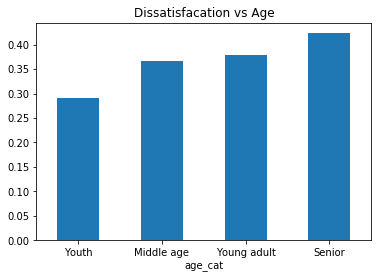

In [42]:
combined_age_pv = (combined_updated.pivot_table(index='age_cat', values='dissatisfied', aggfunc='mean')
                    .sort_values(by='dissatisfied'))

combined_age_pv.plot(kind='bar', rot=0, legend=False, title='Dissatisfacation vs Age')

The plot essentially shows that younger employees to a lesser extent resigns as a result of dissatisfaction when compared to their older colleagues.

As previously mentioned, younger age probably on average means fewer years in the institute. This suspected correlation seem to rhyme well with the observations from our plots.